In [ ]:
# google drive 마운트
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd

# 데이터 읽어 오기
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('/content/drive/My Drive/data/u.data', sep='\t', names=rating_cols) 

# timestamp 제거 
ratings = ratings.drop('timestamp', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
user_ids = ratings["user_id"].unique().tolist()
movie_ids = ratings["movie_id"].unique().tolist()

# 전체 영화 수 , 사용자 수
num_users = len(user_ids)
num_movies = len(movie_ids)


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size = 0.1)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Flatten, Input, Dropout, Dense, Concatenate

# 영화, 사용자의 feature 차원
latent_dim = 32

movie_input = Input(shape=[1])
movie_embedding = Embedding(num_movies + 1, latent_dim)(movie_input)
movie_vec = Flatten()(movie_embedding)

user_input = Input(shape=[1])
user_embedding = Embedding(num_users + 1, latent_dim)(user_input)
user_vec = Flatten()(user_embedding)

concat = Concatenate(axis=1)([movie_vec, user_vec])

#fc_1 = Dense(128, activation='relu')(concat)
#fc_2 = Dense(16, activation='relu')(fc_1)
#fc_3 = Dense(1, activation="relu")(fc_2)

concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(128, activation='relu')(concat_dropout)
fc_1_dropout = Dropout(0.2)(fc_1)
fc_2 = Dense(16, activation='relu')(fc_1_dropout)
fc_2_dropout = Dropout(0.2)(fc_2)
fc_3 = Dense(1, activation="relu")(fc_2_dropout)



model = Model([movie_input, user_input], fc_3)

model.compile(optimizer='adam', loss='mse')


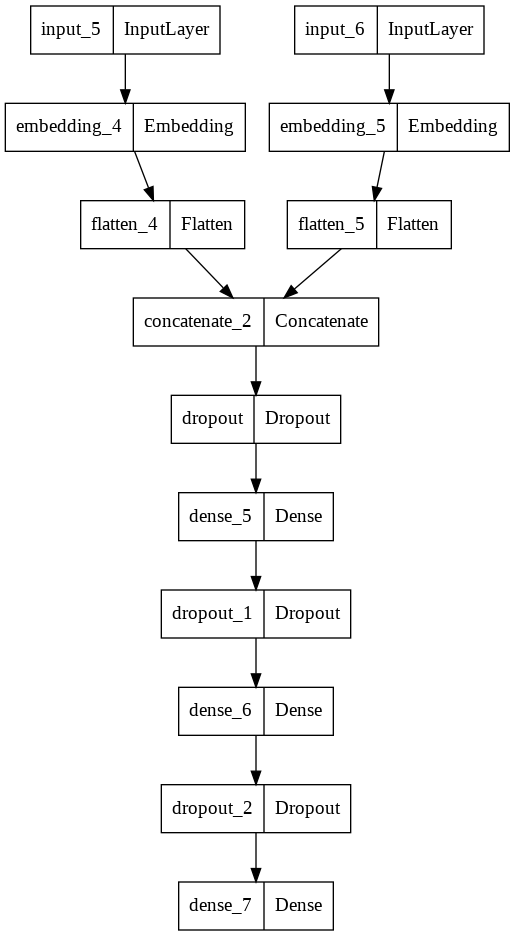

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 32)        53856       ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 1, 32)        30208       ['input_6[0][0]']                
                                                                                            

In [ ]:
history = model.fit([train.movie_id, train.user_id], train.rating, epochs=10, batch_size=32, validation_data=([test.movie_id, test.user_id], test.rating))

Epoch 1/10
2813/2813 [==============================] - 18s 6ms/step - loss: 1.6497 - val_loss: 0.9162
Epoch 2/10
2813/2813 [==============================] - 17s 6ms/step - loss: 1.1237 - val_loss: 0.9036
Epoch 3/10
2813/2813 [==============================] - 16s 6ms/step - loss: 0.9672 - val_loss: 0.8855
Epoch 4/10
2813/2813 [==============================] - 16s 6ms/step - loss: 0.8970 - val_loss: 0.8749
Epoch 5/10
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8634 - val_loss: 0.8624
Epoch 6/10
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8423 - val_loss: 0.8582
Epoch 7/10
2813/2813 [==============================] - 16s 6ms/step - loss: 0.8225 - val_loss: 0.8453
Epoch 8/10
2813/2813 [==============================] - 17s 6ms/step - loss: 0.8075 - val_loss: 0.8426
Epoch 9/10
2813/2813 [==============================] - 17s 6ms/step - loss: 0.7967 - val_loss: 0.8339
Epoch 10/10
2813/2813 [==============================] - 16s 6ms/step - l

In [ ]:
y_pred = model.predict([test.movie_id, test.user_id])
y_true = test.rating

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred, squared=False)


0.9160833554372976

In [ ]:
print(test[:10])
print(y_pred[:10])

       user_id  movie_id  rating
23674       94       356       4
23505       59       123       3
47976      295       222       4
70741      388        98       5
70937      704       272       5
1063       185       216       4
8237       276       164       4
73346      409       289       1
52316      157       276       4
70474      327       178       4
[[3.10929  ]
 [3.598134 ]
 [4.112873 ]
 [4.315837 ]
 [4.1116323]
 [3.9320362]
 [3.8998532]
 [2.497956 ]
 [4.172926 ]
 [3.87154  ]]
